In [37]:
# Install skLearn
!pip install -U scikit-learn

In [38]:
#library needed
import pandas as pd
import numpy as np
#import pylab as pl
import matplotlib.pyplot as plt
#import matplotlib.pylab
#%matplotlib inline
from sklearn import linear_model as lm
from sklearn import metrics as mtx

In [39]:
filename = 'FuelConsumptionCo2.csv'
df = pd.read_csv(filename)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [41]:
df.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

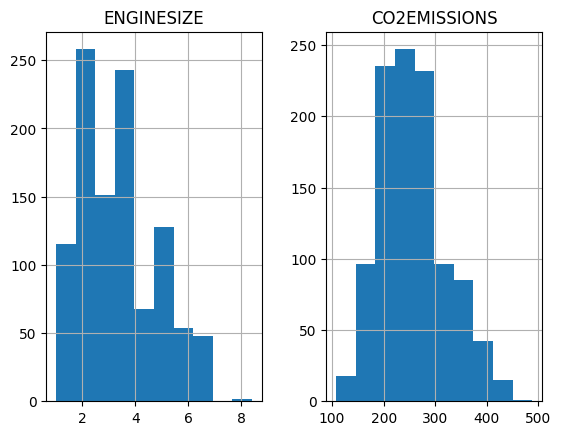

In [42]:
df1 = df[['ENGINESIZE', 'CO2EMISSIONS']]
df1.hist()
plt.show()

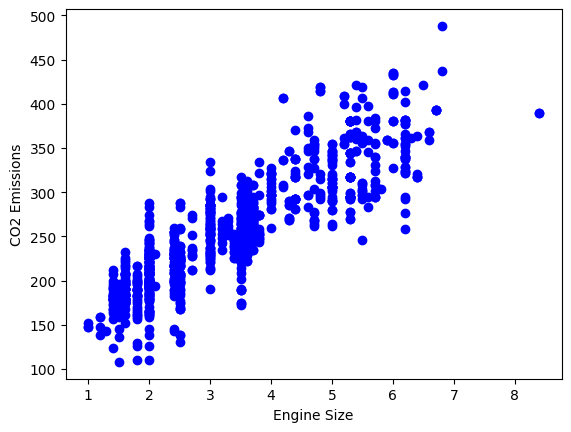

In [43]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color = 'blue')
plt.xlabel ('Engine Size')
plt.ylabel ('CO2 Emissions')
plt.show()

In [44]:
#create training and test dataset
msk = np.random.rand(len(df1)) < 0.8
print(msk)
dt_train = df1[msk]
dt_test = df1[~msk]
type(dt_train)

[ True  True  True ...  True False  True]


pandas.core.frame.DataFrame

In [45]:
# Simple linear regression Enginesize and co2emissions
reg = lm.LinearRegression()
train_x =  dt_train[['ENGINESIZE']].to_numpy()
train_y =  dt_train[['CO2EMISSIONS']].to_numpy()
reg.fit (train_x, train_y )
coef = reg.coef_
intspt = reg.intercept_
print (coef, intspt)

[[39.01772161]] [125.62765439]


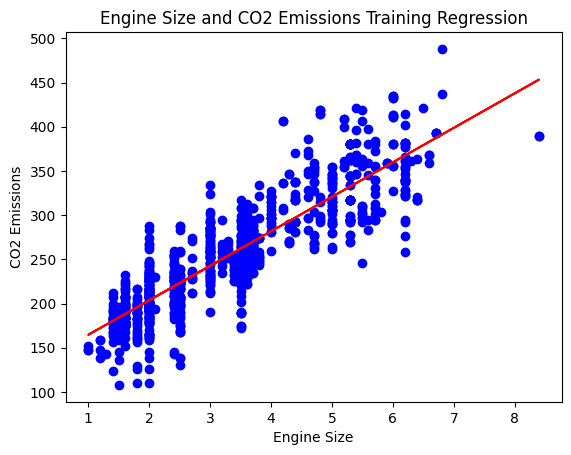

In [46]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, train_x*coef[0][0] + intspt[0], color = 'red')
plt.xlabel ('Engine Size')
plt.ylabel ('CO2 Emissions')
plt.title ('Engine Size and CO2 Emissions Training Regression')
plt.show()

In [47]:
test_x =  dt_test[['ENGINESIZE']].to_numpy()
test_y =  dt_test[['CO2EMISSIONS']].to_numpy()
prdt_y = reg.predict(test_x)
#Mean absolute error
print ("Mean absolute error : ")
mae = np.mean(np.absolute(test_y - prdt_y))
print (mae)

Mean absolute error : 
21.644484118336138


In [48]:
# mean square error, Residual sum of squares
print('mean square error')
mse = np.mean((test_y - prdt_y)**2)
mse

mean square error


789.32697585595

In [49]:

# R square score
print ('R square score')
r2 = mtx.r2_score(test_y, prdt_y)
r2

R square score


0.7944571355779905

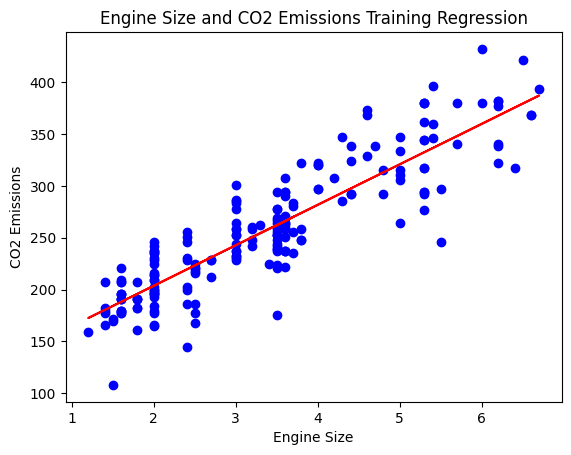

In [50]:
plt.scatter(dt_test.ENGINESIZE, dt_test.CO2EMISSIONS, color = 'blue')
plt.plot(test_x, prdt_y, color = 'red')
plt.xlabel ('Engine Size')
plt.ylabel ('CO2 Emissions')
plt.title ('Engine Size and CO2 Emissions Training Regression')
plt.show()

In [51]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

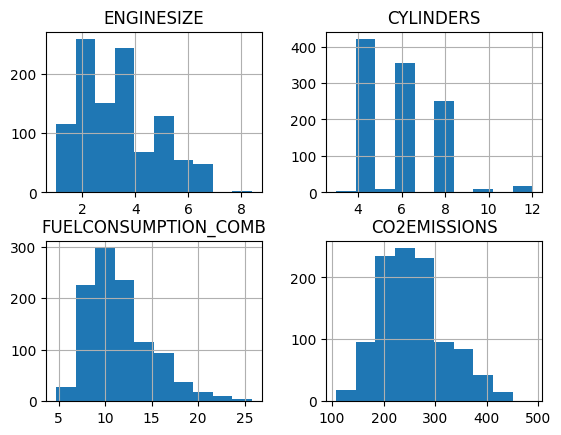

In [52]:
# multiple linear regression
#1. select variables from dataframe
df2 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df2.hist()
plt.show


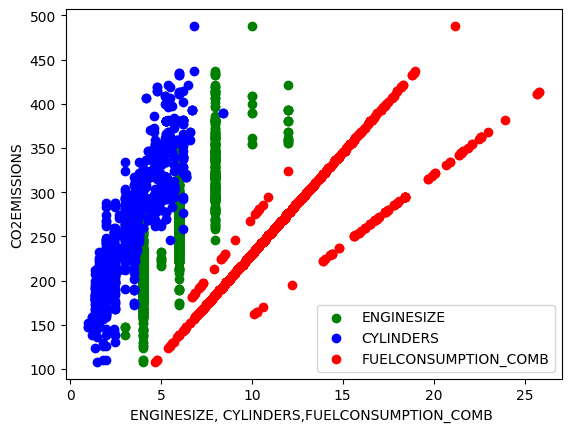

In [53]:
#2 create scatter plots
plt.scatter(df2['CYLINDERS'], df2["CO2EMISSIONS"], color ='green')
plt.scatter(df2['ENGINESIZE'], df2["CO2EMISSIONS"], color ='blue')
plt.scatter(df2['FUELCONSUMPTION_COMB'], df2["CO2EMISSIONS"], color ='red')
plt.xlabel("ENGINESIZE, CYLINDERS,FUELCONSUMPTION_COMB ")
plt.ylabel('CO2EMISSIONS')
plt.legend (["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"])
plt.show()

In [54]:
# 3. create training and teat dataset
idx = np.random.rand(len(df2)) < 0.8
train_dat = df2[idx]
test_dat = df2[~idx]

In [55]:
#4. run multiple linear regression with training dataset 
# creat training data arrays
train_x = train_dat[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]].to_numpy()
train_y = train_dat[['CO2EMISSIONS']].to_numpy()
reg = lm.LinearRegression()
reg.fit(train_x,train_y)
coef = reg.coef_
incpt = reg.intercept_
print (coef, incpt)

[[10.69476026  7.02987573 10.0744169 ]] [63.21505576]


In [56]:
#5. validate with test dataset
# create testing data array
test_x = test_dat[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]].to_numpy()
test_y = test_dat[['CO2EMISSIONS']].to_numpy()
y_hat = reg.predict(test_x)

# Mean square error
print("Mean square error: ")
#mse = np.mean((y_hat - test_y)**2)
mse = mtx.mean_squared_error(test_y, y_hat)
print (mse)

#R square
print ("R sqquare: ")
r2 = mtx.r2_score(test_y, y_hat)
print(r2)
#print(f"{r2:.0%}")  #format to percentage

Mean square error: 
598.9626097011457
R sqquare: 
0.8557888338678057


In [57]:
mtx.median_absolute_error(test_y, y_hat)

10.525498810126564

In [58]:
mtx.root_mean_squared_error(test_y, y_hat)

24.473712626022756

In [59]:
mtx.max_error(test_y, y_hat)

76.39393658726527

In [60]:
#mtx.get_scorer_names()

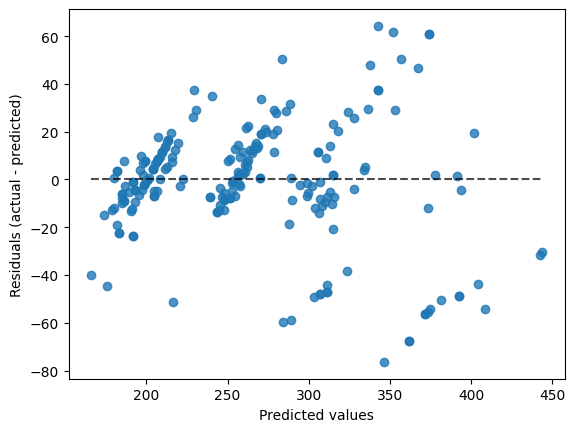

In [64]:
dsp = mtx.PredictionErrorDisplay(y_true=test_y, y_pred=y_hat)
dsp.plot()